In [1]:
#Import the required libraries

import pandas as pd
import numpy as np
%pylab inline
import seaborn as sns

from sklearn import tree
from sklearn import metrics


Populating the interactive namespace from numpy and matplotlib


In [2]:
# import the file
df = pd.read_csv('Churn_Modelling.csv',error_bad_lines=False)

#print len(df)               #-- Check the number of rows
#df.columns                  #-- Check the columns

#Exited : flag indicating customer's churn status. 
    #0 : Existing customer
    #1 : Churned customer


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
#Check the customer split at Exited flag level
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [4]:
#Convert categorical variables to string:
df['CustomerId']=df['CustomerId'].astype(str)
df['HasCrCard']=df['HasCrCard'].astype(str)
df['IsActiveMember']=df['IsActiveMember'].astype(str)

# Check the quick summmary of the table
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


##### Finding:
Level of the table = customerId : checked #rows = #rows when grouped by customerId

<AxesSubplot:title={'center':'Age'}, xlabel='Exited'>

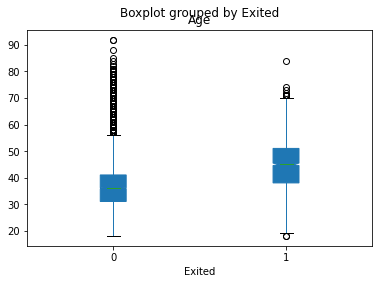

In [5]:
#Check the Age distribution at customer status split
df.boxplot(by='Exited',column=['Age'],grid=False,notch=True,  # notch shape
                         vert=True,  # vertical box alignment
                         patch_artist=True)


##### Findings:
- Older customers are more likely to churn
- Credit Score does not seem to be a very distinguishing factors based on the distribution

([<matplotlib.patches.Wedge at 0x1661f617b38>,
 [Text(0.24845851424237828, 1.0715728471272823, 'Female'),
  Text(-0.24845841391448675, -1.0715728703896426, 'Male')],
 [Text(0.13552282595038814, 0.5844942802512448, '42.7%'),
  Text(-0.13552277122608367, -0.584494292939805, '57.3%')])

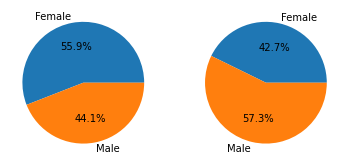

In [6]:
#DIstribution at Gender and Churn Flag (Exited) level 

df5=df.groupby(by=['Gender','Exited'])['RowNumber'].agg('count')
df4=df5.reset_index()
df_churn=df4[df4['Exited']==1][['Gender','RowNumber']]
df_ret=df4[df4['Exited']==0][['Gender','RowNumber']]


plt.subplot(1, 2, 1)
plt.pie(df_churn['RowNumber'],labels=df_churn['Gender'],autopct='%1.1f%%')
plt

plt.subplot(1, 2, 2)
plt.pie(df_ret['RowNumber'],labels=df_ret['Gender'],autopct='%1.1f%%')

##### Finding:
- Women are more likely to churn than men

<AxesSubplot:xlabel='Geography', ylabel='Age'>

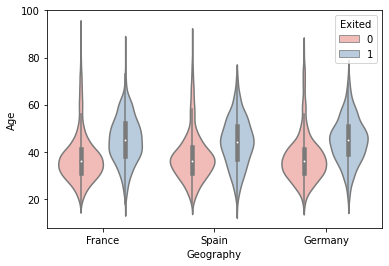

In [7]:
# Age distribution across countries and churn flag
sns.violinplot(x="Geography", y="Age",hue='Exited', data=df, palette="Pastel1")

##### Finding:
- German and older (by age) customers are more likely to churn

<AxesSubplot:xlabel='NumOfProducts'>

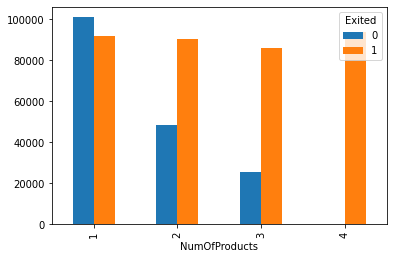

In [8]:
## number of products vs balance :

prod_plt=df.groupby(['NumOfProducts','Exited'])[['Balance']].agg('mean')

prod_plt=prod_plt.reset_index()

prod_plt.pivot("NumOfProducts","Exited","Balance").plot(kind='bar')

<AxesSubplot:xlabel='IsActiveMember'>

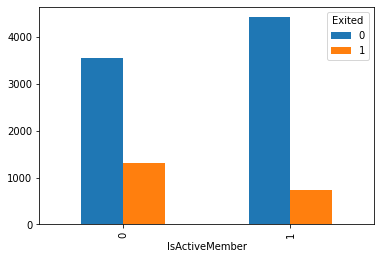

In [9]:
actv_plt=pd.DataFrame(df.groupby(['IsActiveMember','Exited'])['CustomerId'].count()) 
actv_plt=actv_plt.reset_index()
actv_plt.pivot("IsActiveMember","Exited","CustomerId").plot(kind='bar')


##### Finding:
- 37% of non-active members churn vs 17% of active members churn

In [10]:
card_plt=pd.DataFrame(df.groupby(['HasCrCard','Exited'])['CustomerId'].count()) 
card_plt

CustomerId
HasCrCard Exited            
0         0             2332
          1              613
1         0             5631
          1             1424

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

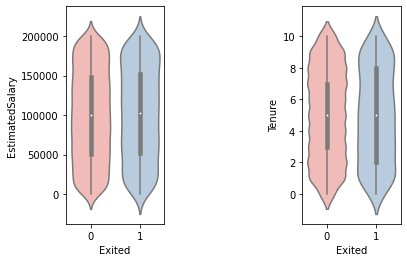

In [11]:
# Check the distribution of various variables across churned and existing customers

plt.subplot(1, 3, 1)
#Check the Estimated Salary distribution at customer status split
sns.violinplot(x="Exited", y="EstimatedSalary", data=df, palette="Pastel1")

plt.subplot(1, 3, 3)
#Check the Tenure distribution at customer status split
sns.violinplot(x="Exited", y="Tenure", data=df, palette="Pastel1")

##### Finding:
- 26% of customers without credit card churn vs 25.2% customers with credit card churn - => might not be a deciding fator

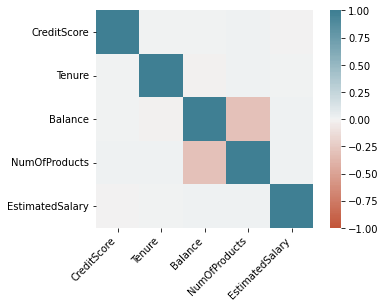

In [12]:
# Correlation Matrix Heat Map

df2=df[['CreditScore','Tenure','Balance','NumOfProducts','EstimatedSalary']]

corr = df2.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [13]:
##import needed modules
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
%pylab inline
import copy
# import the file
df = pd.read_csv(r'Churn_Modelling.csv',error_bad_lines=False)

# Drop unnecessary columns
df2= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1) 
#create design matrices
Y, X = dmatrices('Exited ~ 0 + CreditScore + Geography + Gender + Age + Tenure + Balance + NumOfProducts + HasCrCard + IsActiveMember + EstimatedSalary', df2, return_type="dataframe")


Populating the interactive namespace from numpy and matplotlib


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [14]:
#Varying model paramters
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])
for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

train indices = [1 2 4 5] holdout indices = [0 3]
train indices = [0 2 3 5] holdout indices = [1 4]
train indices = [0 1 3 4] holdout indices = [2 5]


In [15]:
# Import the required libraries
import pandas as pd
import numpy as np
import patsy as pt
%pylab inline
from sklearn.linear_model import LogisticRegression 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from scipy import stats
from sklearn import metrics

#Import the data :
df = pd.read_csv('Churn_Modelling.csv',error_bad_lines=False)

# Data Processing 

formula = 'Exited ~ 0 + EstimatedSalary+CreditScore+ Age+HasCrCard+IsActiveMember + Tenure+ Balance + NumOfProducts + C(Geography) + C(Gender)'
Y, X = pt.dmatrices(formula, df, return_type='dataframe')
y = Y['Exited'].values

#Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



Populating the interactive namespace from numpy and matplotlib


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
#split up data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#set up the classifier
#from sklearn import neighabors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30,
                                       weights='uniform',
                                       p=2)

#fit the classifier
model.fit(X_train, y_train)

#run on training data
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print ("Model accuracy of training dataset is: ",metrics.accuracy_score(y_train, prediction_on_training)) 

# Predict accuracy on test dataset
predicted_classes = model.predict(X_test)
print ("Model accuracy of test dataset is: ",metrics.accuracy_score(y_test, predicted_classes))

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model accuracy of training dataset is:  0.7985714285714286
Model accuracy of test dataset is:  0.791


In [17]:
#Varying model paramters
from sklearn import model_selection

kfold = model_selection.StratifiedKFold(n_splits=3).split(X=X[:6], y=[0,0,0,1,1,1])
for train, holdout in kfold:
    print('train indices =', train, 'holdout indices =', holdout)

train indices = [1 2 4 5] holdout indices = [0 3]
train indices = [0 2 3 5] holdout indices = [1 4]
train indices = [0 1 3 4] holdout indices = [2 5]


In [18]:
# Train the logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)
model.fit(X_train, y_train)

# Predict on training dataset
prediction_train = model.predict(X_train)
print ("Model accuracy on test dataset: ",metrics.accuracy_score(y_train, prediction_train))

#Predict on test dataset
prediction = model.predict(X_test)
print ("Model accuracy on test dataset: ",metrics.accuracy_score(y_test, prediction))

conf_mat=confusion_matrix(y_test, prediction, labels=None, sample_weight=None)

print ("Confustion Matrix: ")
print ("conf_mat")  


Model accuracy on test dataset:  0.7938571428571428
Model accuracy on test dataset:  0.7863333333333333
Confustion Matrix: 
conf_mat


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
# Coefficients :
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

CreditScore             -0.004852
IsActiveMember          -0.001440
C(Gender)[T.Male]       -0.001095
Tenure                  -0.000933
C(Geography)[France]    -0.000818
NumOfProducts           -0.000388
C(Geography)[Spain]     -0.000300
HasCrCard               -0.000209
EstimatedSalary         -0.000002
Balance                  0.000004
C(Geography)[Germany]    0.000911
Age                      0.040573
dtype: float64

In [20]:
# Build the model
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model2.fit(X_train, y_train)

# Predict on training dataset
prediction_train = model2.predict(X_train)
print ("Model accuracy on training dataset: ",metrics.accuracy_score(y_train, prediction_train))

# Predict on Tese dataset
prediction = model2.predict(X_test)
print ("Model accuracy on test dataset: ",metrics.accuracy_score(y_test, prediction))

Model accuracy on training dataset:  0.831
Model accuracy on test dataset:  0.8256666666666667


In [22]:
import pandas as pd
import numpy as np
import patsy as pt
%pylab inline
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from patsy import dmatrices
from subprocess import check_call


#Import the data :
df = pd.read_csv('Churn_Modelling.csv',error_bad_lines=False)

# One Hot Encoding
df1 = pd.get_dummies(df.iloc[:,3:14])

# Extract features and labels
labels=df1['Exited']

# Training and Testing Sets
df1 = df1.drop('Exited', axis = 1)
train, test, train_labels, test_labels = train_test_split(df1,labels, test_size = 0.3, random_state = 11)

#create test data set :
test_df=test.merge(test_labels, right_index=True,left_index=True)
#test_df[:10]


Populating the interactive namespace from numpy and matplotlib


C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3437: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
# Build random forest model:

rf_exp = RandomForestClassifier(n_estimators= 1000,bootstrap = True, random_state=100)
rf_exp.fit(train, train_labels)

# Make predictions on test data
predictions = rf_exp.predict(test)
train_rf_probs = rf_exp.predict_proba(test)[:, 1]

In [25]:
## Confusion Matrix

cm = confusion_matrix(test_labels, predictions)

# Calculate the model accuracy
accuracy = (cm[0,0]+cm[1,1])*1.0/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])

print ("The model accuracy is :", round((accuracy*100),2), " %")

print ("Confustion Matrix: ")
print (cm)

The model accuracy is : 86.03  %
Confustion Matrix: 
[[2287   88]
 [ 331  294]]


<AxesSubplot:>

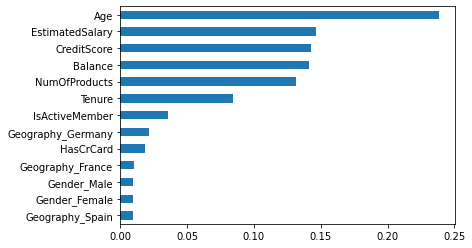

In [26]:
# Metrics importance:
importances = list(rf_exp.feature_importances_)
col_list = list(df1.columns)
feat_importances = pd.Series(rf_exp.feature_importances_, index=train.columns)
feat_importances.sort_values(ascending=True).plot(kind='barh')

In [27]:
# Get numerical feature importances
importances = list(rf_exp.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(df1, round(importance, 2)) for df1, importance in zip(col_list, importances)]

feature_importances

[('CreditScore', 0.14),
 ('Age', 0.24),
 ('Tenure', 0.08),
 ('Balance', 0.14),
 ('NumOfProducts', 0.13),
 ('HasCrCard', 0.02),
 ('IsActiveMember', 0.04),
 ('EstimatedSalary', 0.15),
 ('Geography_France', 0.01),
 ('Geography_Germany', 0.02),
 ('Geography_Spain', 0.01),
 ('Gender_Female', 0.01),
 ('Gender_Male', 0.01)]